In [41]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'C:/Users/user/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [42]:
import os
text_list =read_text_folder("C:/Users/user/Desktop/HW0116/")
print("document number:", len(text_list))

document number: 7


In [43]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [44]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

[('\ufeff', 1),
 ('台灣麥', 4),
 ('當勞', 4),
 ('昨', 2),
 ('宣布', 2),
 ('，', 29),
 ('今起', 2),
 ('調整', 5),
 ('部分', 3),
 ('產品', 2)]

In [45]:
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,70,共,子,13,而且,元現,超值,16,其諾,可以,...,日都將,一口,餐從,什麼,90,這波,至,項薯條,整售價,捲
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0
2,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf


,70,共,子,13,而且,元現,超值,16,其諾,可以,...,日都將,一口,餐從,什麼,90,這波,至,項薯條,整售價,捲
0,0.049945,0.000000,0.049945,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.041459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149835,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081164,0.00000,0.000000,0.000000,...,0.000000,0.041618,0.000000,0.000000,0.000000,0.000000,0.247083,0.050137,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.081495,0.000000,0.000000,0.026489,0.00000,0.000000,0.081495,...,0.000000,0.000000,0.000000,0.098176,0.049088,0.000000,0.000000,0.000000,0.000000,0.098176
3,0.000000,0.000000,0.000000,0.073880,0.089003,0.000000,0.096055,0.03694,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054828,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.065713,0.000000,0.00000,0.000000,0.054548,...,0.065713,0.000000,0.065713,0.000000,0.000000,0.065713,0.121442,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109251,0.00000,0.040492,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274384,0.000000,0.000000,0.000000
6,0.000000,0.032009,0.000000,0.000000,0.000000,0.000000,0.069089,0.02657,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('70', 1.0),
 ('共', 0.0),
 ('子', 1.0),
 ('13', 0.0),
 ('而且', 0.0),
 ('元現', 0.0),
 ('超值', 0.0),
 ('16', 0.0),
 ('其諾', 0.0),
 ('可以', 0.0)]

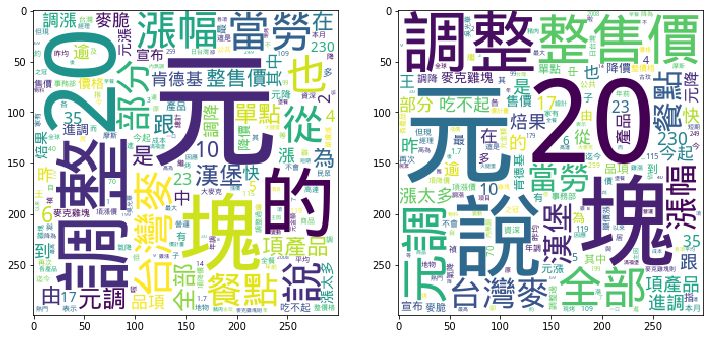

In [55]:
linux_font = r"wqy-microhei.ttc"

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)